In [1]:
include("../src/ising.jl")
using CairoMakie
using JLD2

In [2]:
grid_size = 10

N_Thermalize = 100
N_Samples = 10_000
N_Subsweep = 1

N = 50

J = 1.0

T_Start = 4.0
T_End = 5.0
T_Steps = 20


20

In [3]:
cluster_sizes = Int[]
lookup_table = create_lookup_table(T_Start)
for n in 1:10_000
    i, j, k = rand(1:grid_size, 3)
    cluster, _ = wolff_cluster(create_grid(grid_size), (i, j, k), J, lookup_table)
    push!(cluster_sizes, sum(cluster))
end
mean(cluster_sizes), std(cluster_sizes)

(9.3439, 14.215753288312067)

In [4]:
# metropolis algorithm
met_energies, met_magnetisations, met_temps = temp_sweep(grid_size=grid_size,T_Start=T_Start,T_End=T_End,T_Steps=T_Steps,J=J,N_Sample=N*N_Samples,N_Thermalize=N*N_Thermalize,N_Subsweep=N*N_Subsweep,mc_algorithm=metropolis_step)
met_susceptibilities = met_magnetisations[2] .^2 ./ met_temps .* grid_size^3
met_specific_heats = met_energies[2] .^2 ./ met_temps.^2;

Iterating over temperature... 100%|██████████████████████| Time: 0:00:32


In [5]:
# wolff algorithm
wol_energies, wol_magnetisations, wol_temps = temp_sweep(grid_size=grid_size,T_Start=T_Start,T_End=T_End,T_Steps=T_Steps,J=J,N_Sample=N_Samples,N_Thermalize=N_Thermalize,N_Subsweep=N_Subsweep,mc_algorithm=wolff_step)
wol_susceptibilities = wol_magnetisations[2] .^2 ./ wol_temps .* grid_size^3
wol_specific_heats = wol_energies[2] .^2 ./ wol_temps.^2;

Iterating over temperature... 100%|██████████████████████| Time: 0:00:14


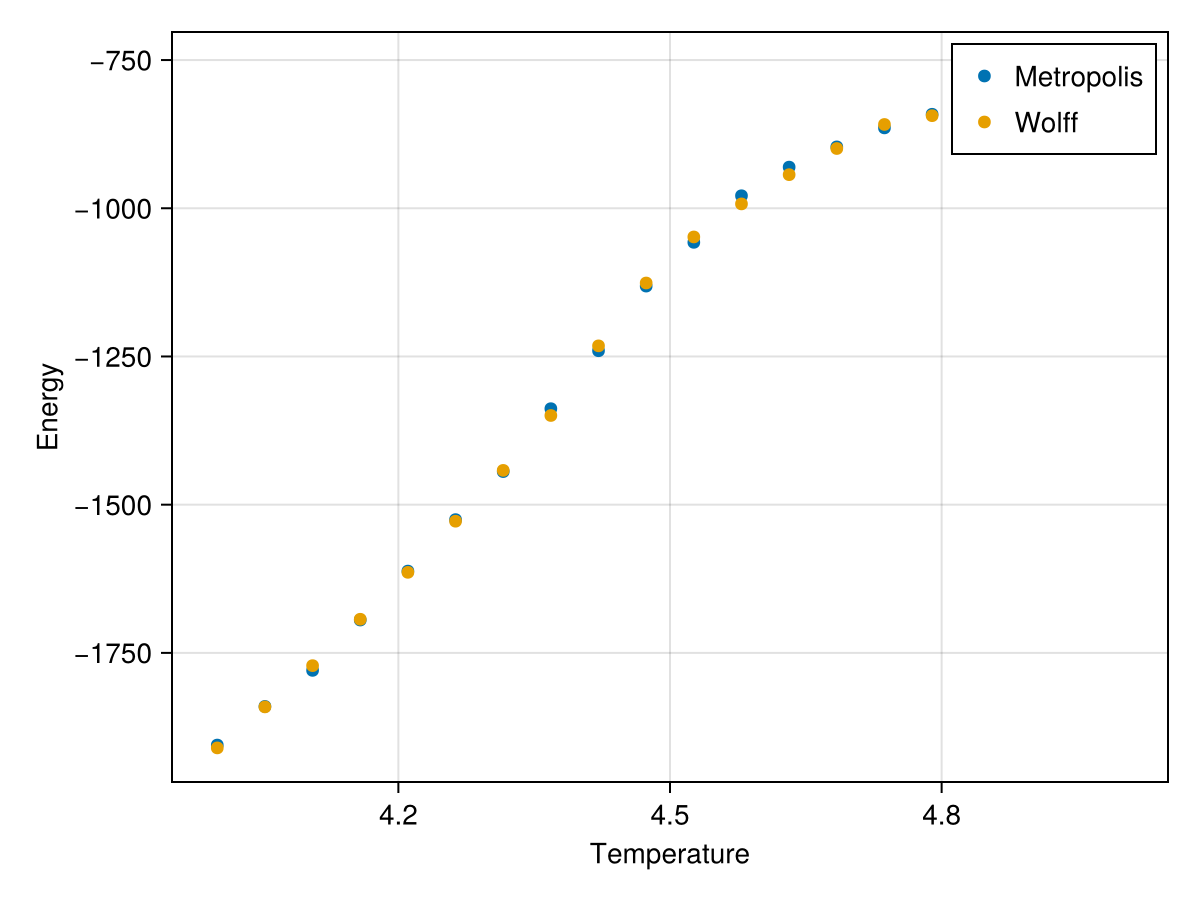

In [6]:
# energy plot
fig = Figure()
ax = Axis(fig[1, 1], xlabel="Temperature", ylabel="Energy")
plot!(ax, met_temps, met_energies[1], label="Metropolis")
plot!(ax, wol_temps, wol_energies[1], label="Wolff")

# plot!(ax, met_temps, met_energies[1] ./ wol_energies[1], label="Metropolis / Wolff", color=:black)
axislegend(ax, position=:rt)
fig

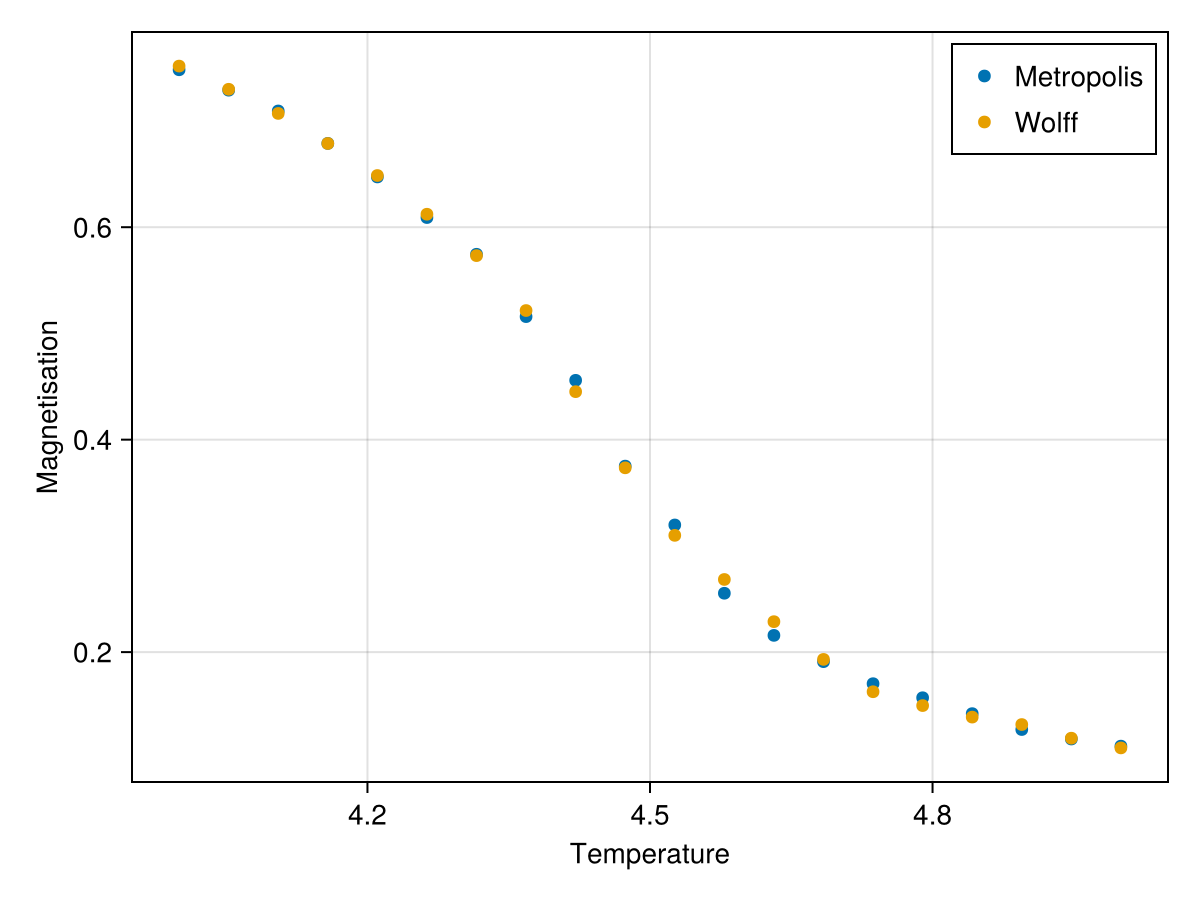

In [7]:
# magnetisation plot
fig = Figure()
ax = Axis(fig[1, 1], xlabel="Temperature", ylabel="Magnetisation")
plot!(ax, met_temps, met_magnetisations[1], label="Metropolis")
plot!(ax, wol_temps, wol_magnetisations[1], label="Wolff")
axislegend(ax, position=:rt)
fig

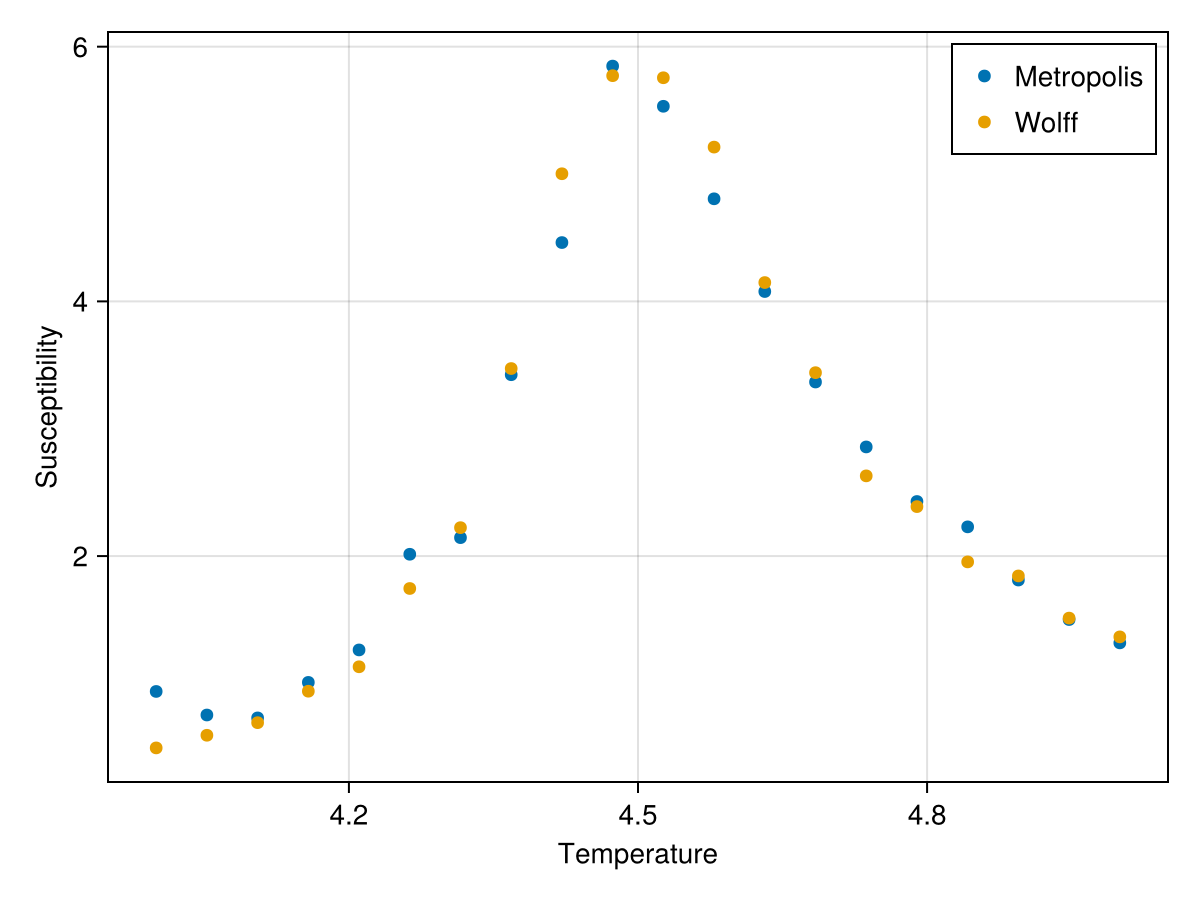

In [8]:
fig = Figure()
ax = Axis(fig[1, 1], xlabel="Temperature", ylabel="Susceptibility")
plot!(ax, met_temps, met_susceptibilities, label="Metropolis")
plot!(ax, wol_temps, wol_susceptibilities, label="Wolff")
axislegend(ax)
fig

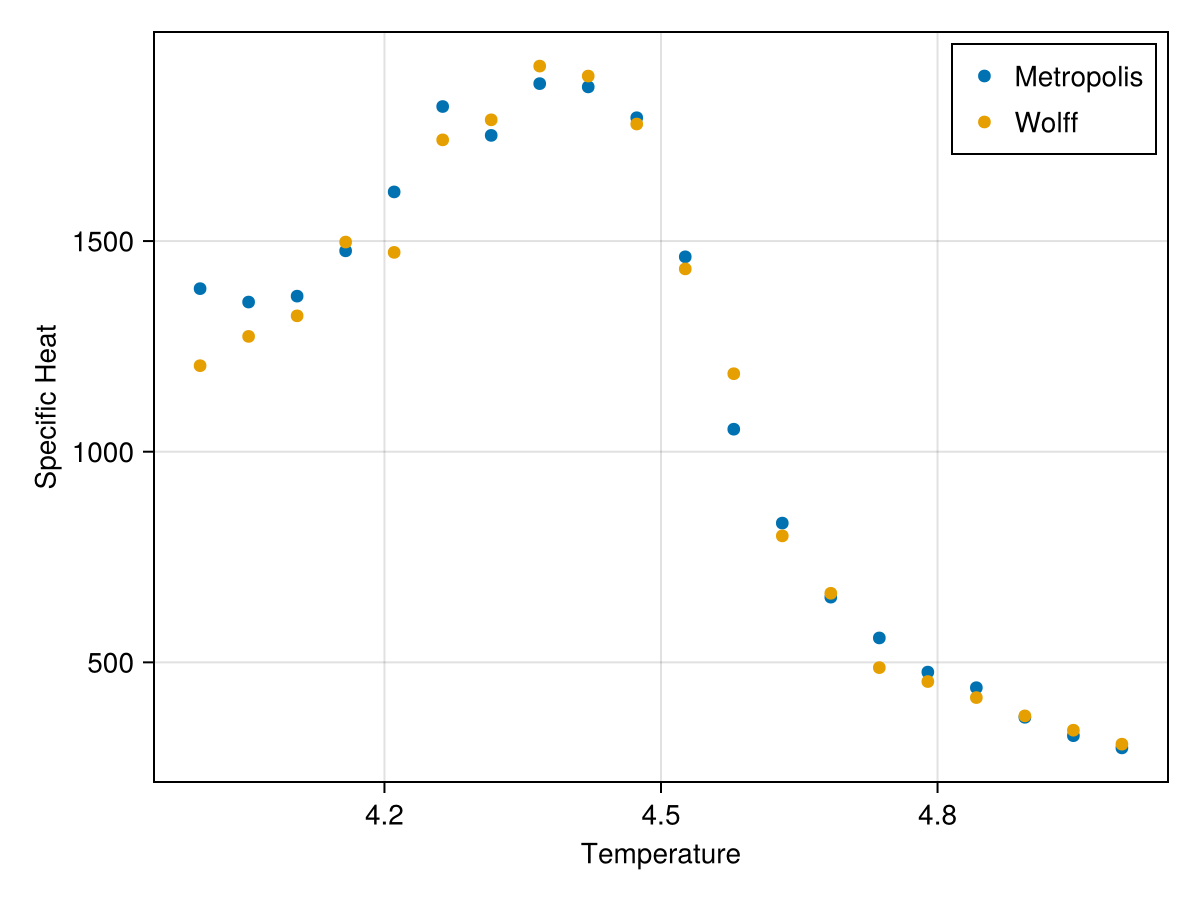

In [9]:
# heat capacity plot
fig = Figure()
ax = Axis(fig[1, 1], xlabel="Temperature", ylabel="Specific Heat")
plot!(ax, met_temps, met_specific_heats, label="Metropolis")
plot!(ax, wol_temps, wol_specific_heats, label="Wolff")
axislegend(ax)
fig